In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
colnames = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","una1","una2","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","result"]

In [3]:
len(colnames)

42

In [4]:
df = pd.read_csv(r"/home/shivam-pc/Desktop/Intrusion_Detection/dataset/corrected.csv",header=None,names=colnames)

In [5]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [6]:
df.shape

(311029, 42)

In [7]:
df.to_csv("revised_kddcup_dataset.csv")

In [8]:
#extracting the icmp packets from our dataset
icmp_df = df[df.loc[:,"protocol_type"] == "icmp"]

In [9]:
icmp_df.isnull().sum()
#none of the values in dataset are null

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
una1                           0
una2      

In [10]:
icmp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
82,0,icmp,eco_i,SF,30,0,0,0,0,0,...,3,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.
156,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,75,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
406,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,98,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
629,0,icmp,ecr_i,SF,30,0,0,0,0,0,...,120,1.00,0.00,1.00,0.0,0.0,0.0,0.0,0.0,normal.
767,0,icmp,eco_i,SF,30,0,0,0,0,0,...,2,0.01,0.01,0.01,0.0,0.0,0.0,0.0,0.0,normal.


In [11]:
#extracting all the important features as a "priority" for preprocessing
features = ["duration","src_bytes","wrong_fragment","count","urgent","num_compromised","srv_count"]
target = "result"

In [12]:
X = icmp_df.loc[:,features]
y = icmp_df.loc[:,target]

In [13]:
classes = np.unique(y)
print(classes)

['ipsweep.' 'multihop.' 'normal.' 'pod.' 'saint.' 'satan.' 'smurf.'
 'snmpguess.']


In [14]:
#replacing all classes of attack with 1 and normal result with 0 in our icmp_df
for i in range(len(classes)):
    if i == 2:
        icmp_df = icmp_df.replace(classes[i], 0)
    else:
        icmp_df = icmp_df.replace(classes[i], 1)

#turning the service attribute to categorical values
icmp_df=icmp_df.replace("eco_i",-0.1)
icmp_df=icmp_df.replace("ecr_i",0.0)
icmp_df=icmp_df.replace("tim_i",0.1)
icmp_df=icmp_df.replace("urp_i",0.2)

In [15]:
y = icmp_df.loc[:,target]

[]

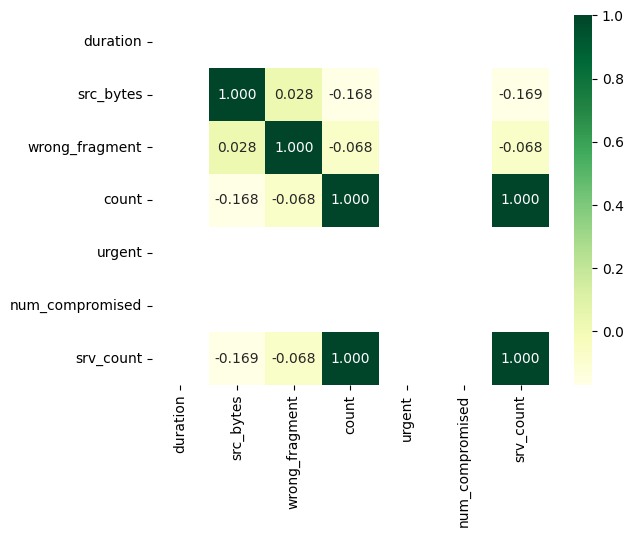

In [16]:
#I selected certain features find some covariance between them and plot a covariance heatmap
sns.heatmap(X.corr(), annot=True,fmt='.3f',cmap="YlGn")
plt.plot()
#the data as seen is highly uncorrelated as most of it is one valued such as the duration one.

In [17]:
X = icmp_df.loc[:,features]
y = icmp_df.loc[:,target]
X.head(5)

,duration,src_bytes,wrong_fragment,count,urgent,num_compromised,srv_count
82,0,30,0,2,0,0,2
156,0,30,0,2,0,0,2
406,0,30,0,2,0,0,2
629,0,30,0,1,0,0,1
767,0,30,0,3,0,0,1


In [18]:
print(list(X.loc[629,:])) #7 input features

[0, 30, 0, 1, 0, 0, 1]


In [19]:
print(y.loc[629])

0


In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [23]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier()]
classifiers = ["LR", "KNN","MLP","DecisionTree"]
scores = []

In [24]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of  model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

Accuracy of  model is:  99.81208704612959
Confusion Matrix:
 [[   98     8]
 [   85 49300]]
Report:
               precision    recall  f1-score   support

           0       0.54      0.92      0.68       106
           1       1.00      1.00      1.00     49385

    accuracy                           1.00     49491
   macro avg       0.77      0.96      0.84     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============
Accuracy of  model is:  99.99595886120709
Confusion Matrix:
 [[  105     1]
 [    1 49384]]
Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       106
           1       1.00      1.00      1.00     49385

    accuracy                           1.00     49491
   macro avg       1.00      1.00      1.00     49491
weighted avg       1.00      1.00      1.00     49491


==============***===============
Accuracy of  model is:  99.92928007112404
Confusion Matrix:
 [[   74    32]


In [25]:
scores=scores[:4]
scores

[99.81208704612959, 99.99595886120709, 99.92928007112404, 99.99797943060355]

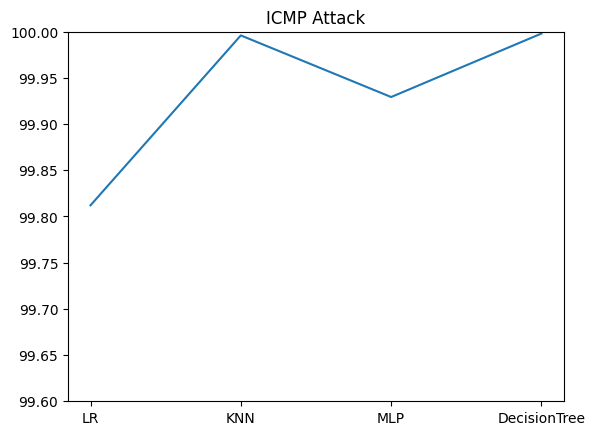

In [26]:
plt.plot(classifiers,scores)
plt.title("ICMP Attack")
plt.ylim(99.6,100)
plt.show()